<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/GM_corn_analysis_with_normalised_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Cleaning and combining initial data (corn yield, acreage, are, GM corn %, Agricultural GDP)

!mkdir datafinal
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/real%20gdp%20by%20state%20agriculture.csv -o ./datafinal/real_gdp_by_state_agriculture.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/alltablesGEcrops.csv -o ./datafinal/GM_crops_%.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/final%20corn%20data.csv -o ./datafinal/final_corn_data.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/Total%20crop%20acreage.csv -o ./datafinal/Total_crop_acreage.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/acres%20operated%20by%20state.csv -o ./datafinal/acres_operated_by_state.csv

!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/employment%20and%20wage%20agri.csv -o ./datafinal/employment_and_wage_agri.csv
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/EXPORTS.csv -o ./datafinal/exports.csv

In [2]:
gm_crops = pd.read_csv('/content/GM crops %.csv')

In [3]:
corn = pd.read_csv('/content/final corn data.csv')

In [4]:
gdp_agri = pd.read_csv('/content/real gdp by state agriculture.csv')

Other values are also saved as dataframes, which will be used to normalise agricultural GDP and to see which other ones contribute to agricultural GDP other than GM corn production

In [5]:
crops_planted_acreage =pd.read_csv('/content/Total crop acreage.csv')

In [6]:
acres_operated = pd.read_csv('/content/acres operated by state.csv')

In [7]:
jobs_and_wage = pd.read_csv('/content/employment and wage agri.csv')

In [8]:
exports = pd.read_csv('/content/EXPORTS.csv')

In [9]:
population = pd.read_csv('/content/population by state.csv')

Cleaning the GM crop and corn data, merging them together

In [10]:
gm_crops.head()

,Table,Unit,Variety,Year,Attribute,Value
0,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


In [11]:
#gm_crops=gm_crops.drop(columns='Table')

In [12]:
gm_crops["Value"].replace({".": "0"}, inplace=True)
gm_crops["Value"].replace({"*": "0"}, inplace=True)

In [13]:
gm_crops.dtypes

Table        object
Unit         object
Variety      object
Year          int64
Attribute    object
Value        object
dtype: object

In [14]:
gm_crops["Value"] = gm_crops["Value"].astype(float).astype(int)

In [15]:
gm_crops.dtypes

Table        object
Unit         object
Variety      object
Year          int64
Attribute    object
Value         int64
dtype: object

In [16]:
corn.head()

,Year,State,Unnamed: 2,Area planted,Area harvested for grain,Yield,Production
0,2005,Alabama,NaN,220,200,119,23800
1,2005,Arizona,NaN,50,22,195,4290
2,2005,Arkansas,NaN,240,230,131,30130
3,2005,California,NaN,560,130,172,22360
4,2005,Colorado,NaN,1100,950,148,140600


In [17]:
corn=corn.drop(columns='Unnamed: 2')

In [18]:
corn.dtypes

Year                         int64
State                       object
Area planted                 int64
Area harvested for grain    object
Yield                       object
Production                  object
dtype: object

In [19]:
corn["Area harvested for grain"].replace({"(NA)": "0"}, inplace=True) 
corn["Area harvested for grain"].replace({"": "0"}, inplace=True) 
corn["Yield"].replace({"(NA)": "0"}, inplace=True) 
corn["Yield"].replace({"(NA)": "0"}, inplace=True) 
corn["Production"].replace({"(NA)": "0"}, inplace=True) 
corn["Production"].replace({"": "0"}, inplace=True)


corn["Area harvested for grain"].replace({"(NA)": "0"}, inplace=True)
corn["Area harvested for grain"].replace({"": "0"}, inplace=True)
corn["Yield"].replace({"(NA)": "0"}, inplace=True)
corn["Yield"].replace({"(NA)": "0"}, inplace=True)
corn["Production"].replace({"(NA)": "0"}, inplace=True)
corn["Production"].replace({"": "0"}, inplace=True)

corn["Area harvested for grain"] = corn["Area harvested for grain"].astype(float).astype(int)
corn["Yield"] = corn["Yield"].astype(float).astype(int)
corn["Production"] = corn["Production"].astype(float).astype(int)

In [20]:
corn["Area harvested for grain"].replace({"NA": "0"}, inplace=True) 

In [21]:
corn["Area harvested for grain"].replace({"inf": "0"}, inplace=True) 

In [22]:
corn = corn.fillna(0)

In [23]:
corn["Area harvested for grain"].astype(float).astype(int)

0        200
1         22
2        230
3        130
4        950
       ...  
730       90
731       38
732     2680
733       67
734    81482
Name: Area harvested for grain, Length: 735, dtype: int64

In [24]:
corn["Yield"] = corn["Yield"].astype(float).astype(int)
corn["Production"] = corn["Production"].astype(float).astype(int)

In [25]:
gm_crops['Attribute'].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin', 'Other States', 'U.S.', 'Alabama',
       'Arkansas', 'California', 'Georgia', 'Louisiana', 'Mississippi',
       'North Carolina', 'Tennessee'], dtype=object)

In [26]:
corn['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas ', 'California', 'Colorado ',
       'Connecticut ', 'Delaware', 'Florida ', 'Georgia ', 'Idaho ',
       'Illinois ', 'Indiana', 'Iowa ', 'Kansas ', 'Kentucky ',
       'Louisiana', 'Maine ', 'Maryland ', 'Massachusetts ', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri ', 'Montana ', 'Nebraska',
       'Nevada ', 'New Hampshire ', 'New Jersey ', 'New Mexico ',
       'New York ', 'North Carolina', 'North Dakota ', 'Ohio ',
       'Oklahoma', 'Oregon ', 'Pennsylvania ', 'Rhode Island ',
       'South Carolina', 'South Dakota ', 'Tennessee ', 'Texas ', 'Utah ',
       'Vermont ', 'Virginia ', 'Washington', 'West Virginia ',
       'Wisconsin ', 'Wyoming ', 'United States'], dtype=object)

In [27]:
corn['State'].replace({'Arkansas ': 'Arkansas'}, inplace=True)

In [28]:
corn['State'].replace({'Colorado ': 'Colorado', 'Connecticut ':'Conneticut', 'Florida ':'Florida','Georgia ':'Georgia', 'Idaho ':'Idaho', 'Illinois ':'Illinois', 'Iowa ':'Iowa','Kansas ':'Kansas','Kentucky ':'Kentucky', 'Maine ':'Maine', 'Massachusetts ':'Massachusetts','Missouri ':'Missouri','North Dakota ':'North Dakota','Ohio ':'Ohio','South Dakota ':'South Dakota','Texas ':'Texas', 'Wisconsin ':'Wisconsin'}, inplace=True)

In [29]:
gm_crops.head()

,Table,Unit,Variety,Year,Attribute,Value
0,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


In [30]:
gm_corn = gm_crops[(gm_crops['Unit']=='Percent of corn planted')&(gm_crops['Variety']=='All GE varieties')]

In [31]:
gm_corn.head()

,Table,Unit,Variety,Year,Attribute,Value
945,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2000,Illinois,17
946,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2000,Indiana,11
947,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2000,Iowa,30
948,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2000,Kansas,33
949,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,2000,Michigan,12


In [32]:
gm_corn["Attribute"].replace({"U.S.": "United States"}, inplace=True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [33]:
gm_corn["Attribute"].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin', 'Other States', 'United States'],
      dtype=object)

In [34]:
corn['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Conneticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland ', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana ', 'Nebraska', 'Nevada ',
       'New Hampshire ', 'New Jersey ', 'New Mexico ', 'New York ',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon ',
       'Pennsylvania ', 'Rhode Island ', 'South Carolina', 'South Dakota',
       'Tennessee ', 'Texas', 'Utah ', 'Vermont ', 'Virginia ',
       'Washington', 'West Virginia ', 'Wisconsin', 'Wyoming ',
       'United States'], dtype=object)

---

# Merging data for corn table

Next step is to merge all the dataframes and calculate the actual level of GM crop area by multiplying the percentage and the total corn area planted

In [35]:
corn_table = corn.merge(gm_corn, how='inner', left_on=['Year', 'State'], right_on=['Year', 'Attribute'])

In [36]:
corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value
0,2005,Illinois,12100,11950,143,1708850,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Illinois,36
1,2005,Indiana,5900,5770,154,888580,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Indiana,26
2,2005,Iowa,12800,12500,173,2162500,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Iowa,60
3,2005,Kansas,3650,3450,135,465750,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Kansas,63
4,2005,Michigan,2250,2010,143,287430,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Michigan,40


In [37]:
corn_table['Value'] = corn_table['Value'].div(100).round(2)

In [38]:
corn_table["GM corn area"] = corn_table["Area planted"] * corn_table["Value"]

In [39]:
corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value,GM corn area
0,2005,Illinois,12100,11950,143,1708850,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Illinois,0.36,4356.0
1,2005,Indiana,5900,5770,154,888580,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Indiana,0.26,1534.0
2,2005,Iowa,12800,12500,173,2162500,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Iowa,0.60,7680.0
3,2005,Kansas,3650,3450,135,465750,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Kansas,0.63,2299.5
4,2005,Michigan,2250,2010,143,287430,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Michigan,0.40,900.0


In [40]:
corn_table.shape

(210, 12)

In [41]:
corn_table.describe()

,Year,Area planted,Yield,Production,Value,GM corn area
count,210.000000,210.000000,210.000000,2.100000e+02,210.000000,210.000000
mean,2012.000000,11835.647619,152.714286,1.760686e+06,0.838048,9999.321333
std,4.330818,21863.691164,24.403198,3.225541e+06,0.143679,18725.251119
min,2005.000000,1410.000000,75.000000,1.367100e+05,0.180000,621.000000
25%,2008.000000,3350.000000,137.000000,4.212700e+05,0.800000,2459.250000
50%,2012.000000,4875.000000,154.000000,6.139100e+05,0.885000,4276.250000
75%,2016.000000,9400.000000,171.000000,1.542000e+06,0.930000,8012.625000
max,2019.000000,97155.000000,210.000000,1.514804e+07,0.980000,86483.680000


How to export csv??

---

In [42]:
gdp_agri.head()

,Year,State,Agri GDP
0,2005,United States,196126.0
1,2005,Alabama,3837.0
2,2005,Alaska,417.0
3,2005,Arizona,3019.6
4,2005,Arkansas,4282.6


In [43]:
gdp_agri.dtypes

Year          int64
State        object
Agri GDP    float64
dtype: object

In [44]:
gdp_agri["Agri GDP"] = gdp_agri["Agri GDP"].astype(int)

In [45]:
corn_table = corn_table.merge(gdp_agri, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [46]:
corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value,GM corn area,Agri GDP
0,2005,Illinois,12100,11950,143,1708850,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Illinois,0.36,4356.0,3923
1,2005,Indiana,5900,5770,154,888580,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Indiana,0.26,1534.0,3334
2,2005,Iowa,12800,12500,173,2162500,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Iowa,0.60,7680.0,7813
3,2005,Kansas,3650,3450,135,465750,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Kansas,0.63,2299.5,5063
4,2005,Michigan,2250,2010,143,287430,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Michigan,0.40,900.0,3481


In [47]:
corn_table.tail()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value,GM corn area,Agri GDP
205,2019,Ohio,2800,2570,164,421480,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Ohio,0.89,2492.0,4458
206,2019,South Dakota,4350,3910,145,566950,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,South Dakota,0.94,4089.0,5001
207,2019,Texas,2500,2150,133,285950,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Texas,0.95,2375.0,13521
208,2019,Wisconsin,3800,2680,168,450240,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Wisconsin,0.89,3382.0,7182
209,2019,United States,89700,81482,168,13691561,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.92,82524.0,243607


In [48]:
corn_table.describe()

,Year,Area planted,Yield,Production,Value,GM corn area,Agri GDP
count,210.000000,210.000000,210.000000,2.100000e+02,210.000000,210.000000,210.000000
mean,2012.000000,11835.647619,152.714286,1.760686e+06,0.838048,9999.321333,20757.033333
std,4.330818,21863.691164,24.403198,3.225541e+06,0.143679,18725.251119,52491.743304
min,2005.000000,1410.000000,75.000000,1.367100e+05,0.180000,621.000000,2300.000000
25%,2008.000000,3350.000000,137.000000,4.212700e+05,0.800000,2459.250000,4317.500000
50%,2012.000000,4875.000000,154.000000,6.139100e+05,0.885000,4276.250000,5631.000000
75%,2016.000000,9400.000000,171.000000,1.542000e+06,0.930000,8012.625000,8303.250000
max,2019.000000,97155.000000,210.000000,1.514804e+07,0.980000,86483.680000,243607.000000


In [49]:
corn_table.to_csv('corn_dataframe.csv')

In [50]:
corn_general = corn_table[(corn_table['State']=='United States')]

In [51]:
corn_table[(corn_table['Agri GDP']>14000)]

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value,GM corn area,Agri GDP
13,2005,United States,81779,75117,148,11114082,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.52,42525.08,196126
27,2006,United States,78327,70648,149,10534868,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.61,47779.47,199349
41,2007,United States,93600,86542,151,13073893,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.73,68328.00,176569
55,2008,United States,85982,78570,154,12091648,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.80,68785.60,180295
69,2009,United States,86382,79490,165,13091862,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.85,73424.70,199976
83,2010,United States,88192,81446,153,12446865,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.86,75845.12,193856
97,2011,United States,91936,83989,147,12359612,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.88,80903.68,186395
111,2012,United States,97155,87375,123,10780296,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.88,85496.40,179573
125,2013,United States,95365,87668,159,13925147,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.90,85828.50,209388
139,2014,United States,90597,83136,171,14215532,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.93,84255.21,211758


In [52]:
corn_general.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value,GM corn area,Agri GDP
13,2005,United States,81779,75117,148,11114082,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.52,42525.08,196126
27,2006,United States,78327,70648,149,10534868,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.61,47779.47,199349
41,2007,United States,93600,86542,151,13073893,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.73,68328.00,176569
55,2008,United States,85982,78570,154,12091648,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.80,68785.60,180295
69,2009,United States,86382,79490,165,13091862,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,United States,0.85,73424.70,199976


In [53]:
corn_general.dtypes

Year                          int64
State                        object
Area planted                  int64
Area harvested for grain     object
Yield                         int64
Production                    int64
Table                        object
Unit                         object
Variety                      object
Attribute                    object
Value                       float64
GM corn area                float64
Agri GDP                      int64
dtype: object

# Exploratory analysis with scatterplots

In [54]:
corn_table1 = corn_table[corn_table['State']!='United States']

In [55]:
corn_table1 = corn_table1[corn_table1['State']!='Texas']

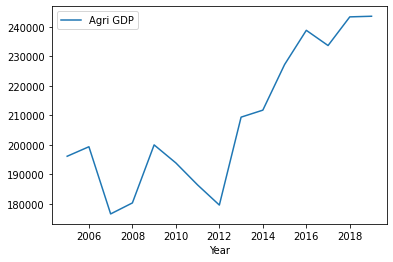

In [56]:
corn_general.plot(x= 'Year', y = 'Agri GDP')

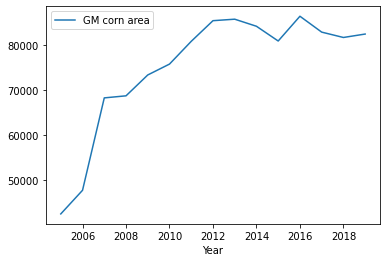

In [57]:
corn_general.plot(x= 'Year', y = 'GM corn area')

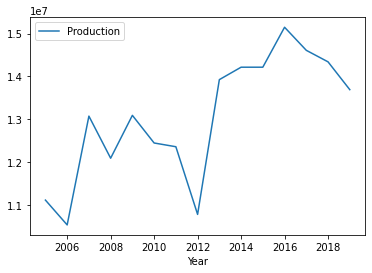

In [58]:
corn_general.plot(x= 'Year', y = 'Production')

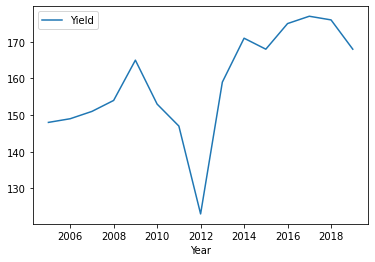

In [59]:
corn_general.plot(x= 'Year', y = 'Yield')

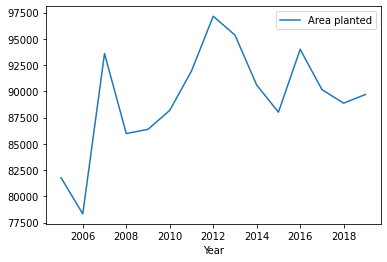

In [60]:
corn_general.plot(x= 'Year', y = 'Area planted')

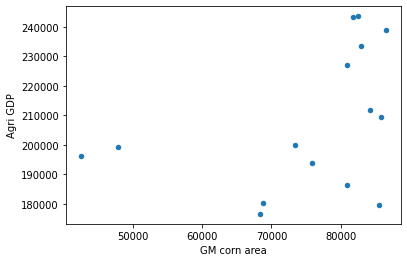

In [61]:
corn_general.plot.scatter(x= 'GM corn area', y = 'Agri GDP')

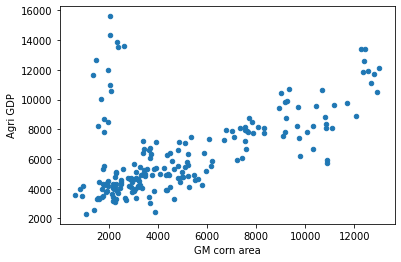

In [62]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='GM corn area', y ='Agri GDP')

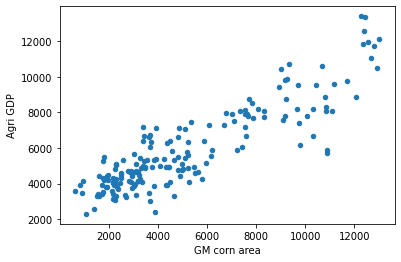

In [63]:
corn_table1.plot.scatter(x='GM corn area', y ='Agri GDP')

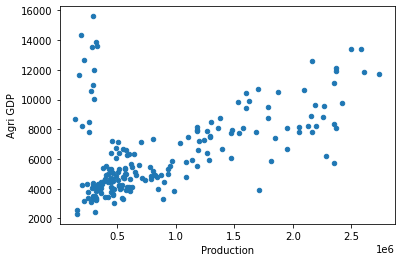

In [64]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Production', y ='Agri GDP')

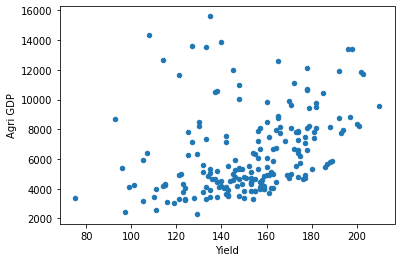

In [65]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Yield', y ='Agri GDP')

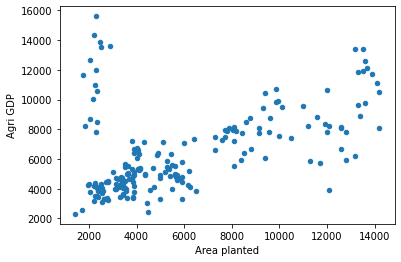

In [66]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Area planted', y ='Agri GDP')

In [67]:
corn_table.dtypes

Year                          int64
State                        object
Area planted                  int64
Area harvested for grain     object
Yield                         int64
Production                    int64
Table                        object
Unit                         object
Variety                      object
Attribute                    object
Value                       float64
GM corn area                float64
Agri GDP                      int64
dtype: object

In [68]:
corn_table["Area harvested for grain"] = corn_table["Area harvested for grain"].astype(float).astype(int)

In [69]:
corn_table["Value"] = corn_table["Value"].astype(float).astype(int)
corn_table["GM corn area"] = corn_table["GM corn area"].astype(float).astype(int)

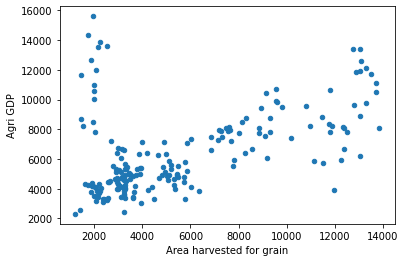

In [70]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='Area harvested for grain', y ='Agri GDP')

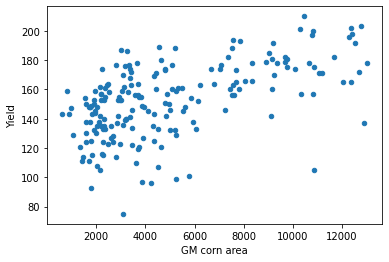

In [71]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='GM corn area', y ='Yield')

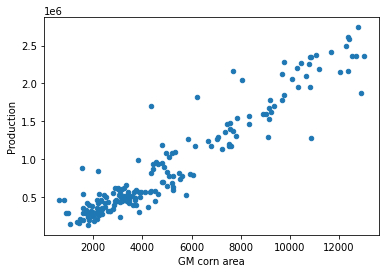

In [72]:
corn_table[corn_table['State']!='United States'].plot.scatter(x='GM corn area', y ='Production')

---

# Corn descriptive statistics

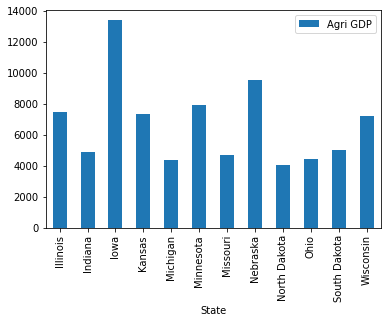

In [73]:
corn_table1[corn_table1['Year']==2019].plot.bar('State','Agri GDP')

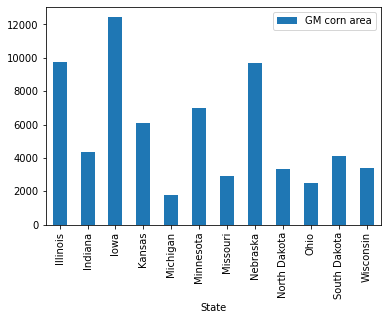

In [74]:
corn_table1[corn_table1['Year']==2019].plot.bar('State','GM corn area')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


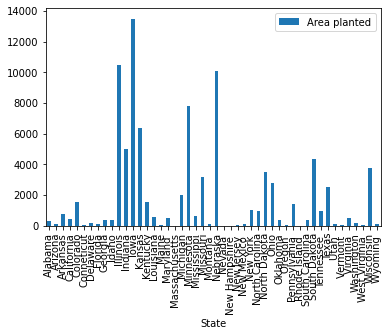

In [75]:
corn[corn['Year']==2019][corn['State']!='United States'].plot.bar('State','Area planted')

In [76]:
gdp_agri.dtypes

Year         int64
State       object
Agri GDP     int64
dtype: object

In [77]:
gdp_agri['Year'].max()

2019

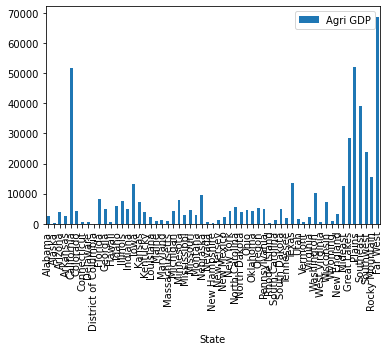

In [78]:
gdp_agri[(gdp_agri['Year']==2019)&(gdp_agri['State']!='United States')].plot.bar('State','Agri GDP')

In [79]:
gdp_agri.groupby(['Year', 'State']).count().sort_values(ascending=False, by ='Agri GDP')

Agri GDP
Year State                
2018 Far West            2
2005 Alabama             1
2015 California          1
2014 Utah                1
     Vermont             1
...                    ...
2010 Arkansas            1
     California          1
     Colorado            1
     Connecticut         1
2019 Wyoming             1

[899 rows x 1 columns]

In [80]:
gdp_agri[(gdp_agri['Year']==2019)&(gdp_agri['State']=='Far West')]

,Year,State,Agri GDP
899,2019,Far West,68707


---

Checking correlation just for 1 year

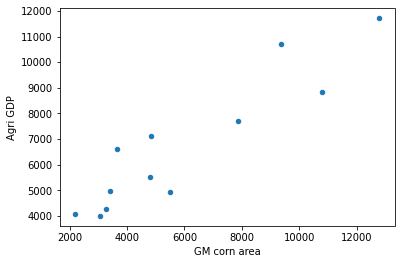

In [81]:
corn_table1[corn_table1['Year']==2016].plot.scatter(x= 'GM corn area', y = 'Agri GDP')

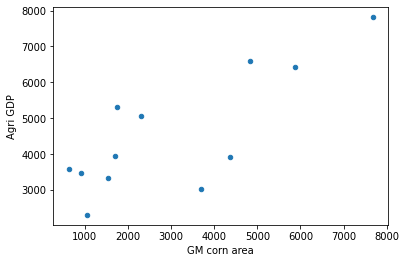

In [82]:
corn_table1[corn_table1['Year']==2005].plot.scatter(x= 'GM corn area', y = 'Agri GDP')

---

Checking for correlations

# Checking for correlations for initial variables

In [83]:
corn_table[corn_table['State']!='United States'].corr()

,Year,Area planted,Area harvested for grain,Yield,Production,Value,GM corn area,Agri GDP
Year,1.000000,0.037916,0.033849,0.339200,0.101815,NaN,0.201898,0.258209
Area planted,0.037916,1.000000,0.998061,0.547011,0.974593,NaN,0.962466,0.489489
Area harvested for grain,0.033849,0.998061,1.000000,0.553025,0.978386,NaN,0.958149,0.484225
Yield,0.339200,0.547011,0.553025,1.000000,0.674699,NaN,0.555540,0.347681
Production,0.101815,0.974593,0.978386,0.674699,1.000000,NaN,0.948528,0.517038
Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM corn area,0.201898,0.962466,0.958149,0.555540,0.948528,NaN,1.000000,0.545486
Agri GDP,0.258209,0.489489,0.484225,0.347681,0.517038,NaN,0.545486,1.000000


In [84]:
import seaborn as sns

In [85]:
corn_for_cor=corn_table1.drop(columns='Year')

In [86]:
corn_for_cor=corn_table1.drop(columns='Value')

In [87]:
corn_for_cor=corn_for_cor.drop(columns='Year')

In [88]:
corn_for_cor.corr()

,Area planted,Yield,Production,GM corn area,Agri GDP
Area planted,1.000000,0.515347,0.972699,0.959574,0.829025
Yield,0.515347,1.000000,0.655348,0.527436,0.634722
Production,0.972699,0.655348,1.000000,0.944657,0.847893
GM corn area,0.959574,0.527436,0.944657,1.000000,0.879661
Agri GDP,0.829025,0.634722,0.847893,0.879661,1.000000


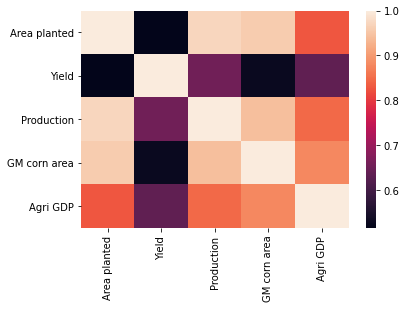

In [89]:
sns.heatmap(corn_for_cor[corn_for_cor['State']!='United States'].corr())

---

# More Descriptive stats

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cefef0860>]],
      dtype=object)

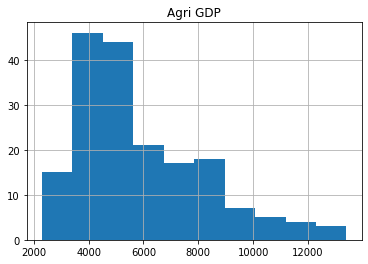

In [90]:
corn_table1.hist(column='Agri GDP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ced5f59e8>]],
      dtype=object)

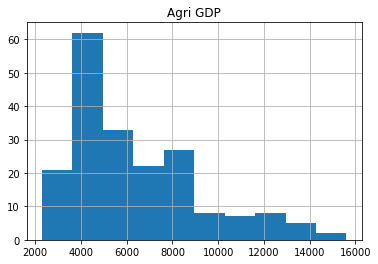

In [91]:
corn_table[corn_table['State']!='United States'].hist(column='Agri GDP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ced61bf98>]],
      dtype=object)

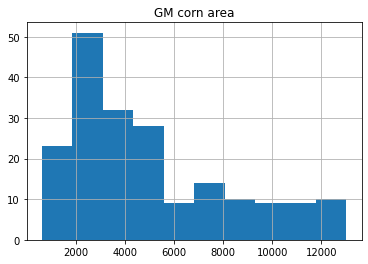

In [92]:
corn_table[corn_table['State']!='United States'].hist(column='GM corn area')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


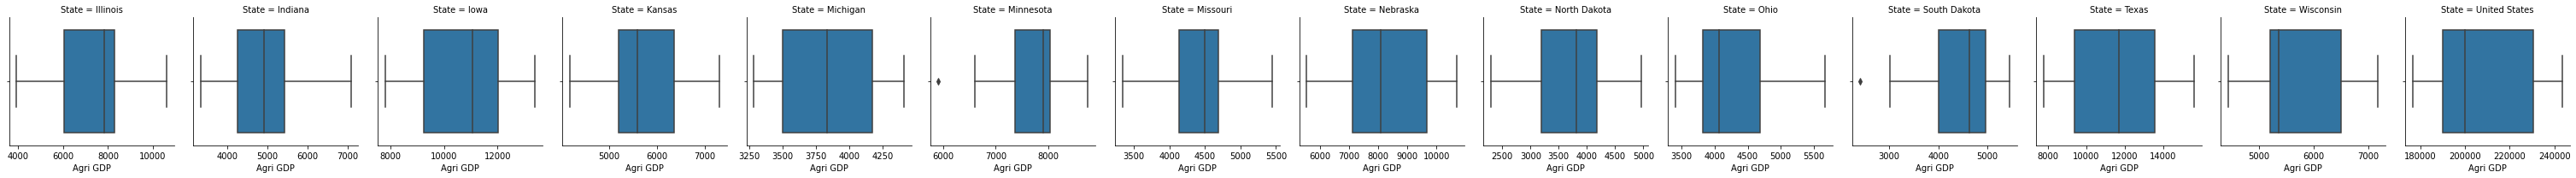

In [93]:
g = sns.FacetGrid(corn_table, col="State", sharex=False)
g.map(sns.boxplot, 'Agri GDP')

---

# Scatter plots for each state

Doing correlations within each state

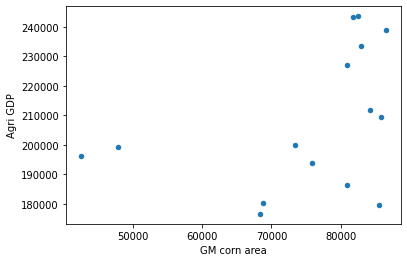

In [94]:
corn_table[corn_table['State']=='United States'].plot.scatter('GM corn area','Agri GDP')

In [95]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Illinois']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.624


In [96]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Indiana']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.614


In [97]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Iowa']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.598


In [98]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Kansas']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.527


In [99]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Michigan']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.610


In [100]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Minnesota']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.634


In [101]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Missouri']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.604


In [102]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Nebraska']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.641


In [103]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='North Dakota']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.603


In [104]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Ohio']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.691


In [105]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='South Dakota']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.590


In [106]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table[corn_table['State']=='Texas']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.614


In [107]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(corn_table1[corn_table1['State']=='Wisconsin']['GM corn area'], corn_table1[corn_table1['State']=='Illinois']['Agri GDP'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.565


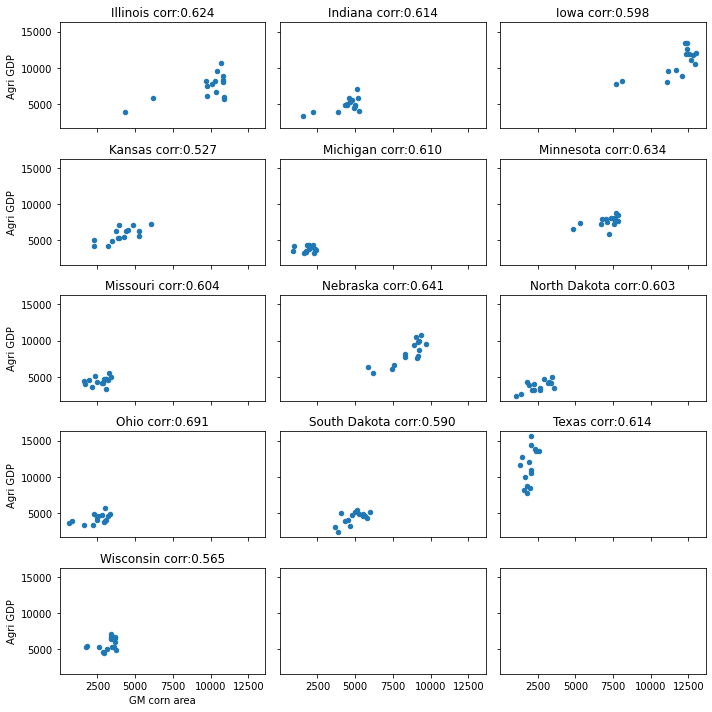

In [108]:
fig, axes = plt.subplots(5, 3, sharex=True, sharey=True, figsize=(10,10))
corn_table[corn_table['State']=='Illinois'].plot.scatter('GM corn area','Agri GDP', ax=axes[0,0])
axes[0,0].set_title('Illinois corr:0.624')
corn_table[corn_table['State']=='Indiana'].plot.scatter('GM corn area','Agri GDP', ax=axes[0,1])
axes[0,1].set_title('Indiana corr:0.614')
corn_table[corn_table['State']=='Iowa'].plot.scatter('GM corn area','Agri GDP', ax=axes[0,2])
axes[0,2].set_title('Iowa corr:0.598')
corn_table[corn_table['State']=='Kansas'].plot.scatter('GM corn area','Agri GDP', ax=axes[1,0])
axes[1,0].set_title('Kansas corr:0.527')
corn_table[corn_table['State']=='Michigan'].plot.scatter('GM corn area','Agri GDP', ax=axes[1,1])
axes[1,1].set_title('Michigan corr:0.610')
corn_table[corn_table['State']=='Minnesota'].plot.scatter('GM corn area','Agri GDP', ax=axes[1,2])
axes[1,2].set_title('Minnesota corr:0.634')
corn_table[corn_table['State']=='Missouri'].plot.scatter('GM corn area','Agri GDP', ax=axes[2,0])
axes[2,0].set_title('Missouri corr:0.604')
corn_table1[corn_table1['State']=='Nebraska'].plot.scatter('GM corn area','Agri GDP', ax=axes[2,1])
axes[2,1].set_title('Nebraska corr:0.641')
corn_table1[corn_table1['State']=='North Dakota'].plot.scatter('GM corn area','Agri GDP', ax=axes[2,2])
axes[2,2].set_title('North Dakota corr:0.603')
corn_table1[corn_table1['State']=='Ohio'].plot.scatter('GM corn area','Agri GDP', ax=axes[3,0])
axes[3,0].set_title('Ohio corr:0.691')
corn_table1[corn_table1['State']=='South Dakota'].plot.scatter('GM corn area','Agri GDP', ax=axes[3,1])
axes[3,1].set_title('South Dakota corr:0.590')
corn_table[corn_table['State']=='Texas'].plot.scatter('GM corn area','Agri GDP', ax=axes[3,2])
axes[3,2].set_title('Texas corr:0.614')
corn_table1[corn_table1['State']=='Wisconsin'].plot.scatter('GM corn area','Agri GDP', ax=axes[4,0])
axes[4,0].set_title('Wisconsin corr:0.565')

plt.tight_layout()
fig.show()

---

# Panel regression or timeseries regression?

In [109]:
regression = corn_table.set_index(["State"])

In [110]:
regression=pd.to_datetime(regression.Year, format='%Y')

In [111]:
regression1 = corn_table.set_index(["State", "Year"])

In [112]:
!pip install linearmodels
from linearmodels import PanelOLS
PanelOLS(regression1['Agri GDP'],regression1['GM corn area'], entity_effects=True, time_effects=True)

     |████████████████████████████████| 1.5MB 4.4MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


PanelOLS 
Num exog: 1, Constant: False
Entity Effects: True, Time Effects: True, Num Other Effects: 0
id: 0x7f5ceca7da58

In [113]:
mod = PanelOLS(regression1['Agri GDP'],regression1['GM corn area'], entity_effects=True, time_effects=True)


/usr/local/lib/python3.6/dist-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


In [114]:
print(mod)

PanelOLS 
Num exog: 1, Constant: False
Entity Effects: True, Time Effects: True, Num Other Effects: 0


---

# Normalising Agriculture GDP and repeating the analysis

Normalising the GDP, first add and clean the acreage operated per state to the Agriculture GDP dataframe and then divide the Agri GDP by that acreage to have the normalised_gdp_agri

In [115]:
acres_operated.head()

,Year,Period,State,Data Item,Value,Unnamed: 5,Unnamed: 6
0,2019,YEAR,Alabama,FARM OPERATIONS - ACRES OPERATED,8300000,NaN,NaN
1,2019,YEAR,Alaska,FARM OPERATIONS - ACRES OPERATED,850000,NaN,NaN
2,2019,YEAR,Arizona,FARM OPERATIONS - ACRES OPERATED,26200000,NaN,NaN
3,2019,YEAR,Arkansas,FARM OPERATIONS - ACRES OPERATED,14000000,NaN,NaN
4,2019,YEAR,California,FARM OPERATIONS - ACRES OPERATED,24300000,NaN,NaN


In [116]:
acres_operated =acres_operated.drop(columns="Unnamed: 5")

In [117]:
acres_operated =acres_operated.drop(columns="Unnamed: 6")

In [118]:
acres_operated.dtypes

Year          int64
Period       object
State        object
Data Item    object
Value         int64
dtype: object

In [119]:
gdp_agri.head()

,Year,State,Agri GDP
0,2005,United States,196126
1,2005,Alabama,3837
2,2005,Alaska,417
3,2005,Arizona,3019
4,2005,Arkansas,4282


In [120]:
acres_operated = acres_operated.drop(columns="Period")
acres_operated = acres_operated.drop(columns="Data Item")


In [121]:
nor_gdp_agri = gdp_agri.merge(acres_operated, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

Add new column with the normalised GDP

In [122]:
nor_gdp_agri["Normalised Agri GDP"] = nor_gdp_agri["Agri GDP"] / nor_gdp_agri["Value"]

In [123]:
nor_gdp_agri

,Year,State,Agri GDP,Value,Normalised Agri GDP
0,2005,Alabama,3837,8800000,0.000436
1,2005,Alaska,417,900000,0.000463
2,2005,Arizona,3019,26250000,0.000115
3,2005,Arkansas,4282,14200000,0.000302
4,2005,California,37673,25900000,0.001455
...,...,...,...,...,...
745,2019,Virginia,2266,7800000,0.000291
746,2019,Washington,10099,14600000,0.000692
747,2019,West Virginia,448,3500000,0.000128
748,2019,Wisconsin,7182,14300000,0.000502


In [124]:
nor_gdp_agri=nor_gdp_agri.drop(columns='Agri GDP')
nor_gdp_agri=nor_gdp_agri.drop(columns='Value')

In [125]:
corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value,GM corn area,Agri GDP
0,2005,Illinois,12100,11950,143,1708850,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Illinois,0,4356,3923
1,2005,Indiana,5900,5770,154,888580,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Indiana,0,1534,3334
2,2005,Iowa,12800,12500,173,2162500,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Iowa,0,7680,7813
3,2005,Kansas,3650,3450,135,465750,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Kansas,0,2299,5063
4,2005,Michigan,2250,2010,143,287430,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Michigan,0,900,3481


In [126]:
nor_corn_table = corn_table.merge(nor_gdp_agri, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [127]:
nor_corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Table,Unit,Variety,Attribute,Value,GM corn area,Agri GDP,Normalised Agri GDP
0,2005,Illinois,12100,11950,143,1708850,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Illinois,0,4356,3923,0.000145
1,2005,Indiana,5900,5770,154,888580,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Indiana,0,1534,3334,0.000224
2,2005,Iowa,12800,12500,173,2162500,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Iowa,0,7680,7813,0.000250
3,2005,Kansas,3650,3450,135,465750,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Kansas,0,2299,5063,0.000107
4,2005,Michigan,2250,2010,143,287430,Genetically engineered (GE) corn varieties,Percent of corn planted,All GE varieties,Michigan,0,900,3481,0.000345


In [128]:
nor_corn_table=nor_corn_table.drop(['Table','Variety','Unit','Value'], axis=1)

In [129]:
nor_corn_table

,Year,State,Area planted,Area harvested for grain,Yield,Production,Attribute,GM corn area,Agri GDP,Normalised Agri GDP
0,2005,Illinois,12100,11950,143,1708850,Illinois,4356,3923,0.000145
1,2005,Indiana,5900,5770,154,888580,Indiana,1534,3334,0.000224
2,2005,Iowa,12800,12500,173,2162500,Iowa,7680,7813,0.000250
3,2005,Kansas,3650,3450,135,465750,Kansas,2299,5063,0.000107
4,2005,Michigan,2250,2010,143,287430,Michigan,900,3481,0.000345
...,...,...,...,...,...,...,...,...,...,...
190,2019,North Dakota,3500,3230,141,455430,North Dakota,3360,4069,0.000104
191,2019,Ohio,2800,2570,164,421480,Ohio,2492,4458,0.000328
192,2019,South Dakota,4350,3910,145,566950,South Dakota,4088,5001,0.000116
193,2019,Texas,2500,2150,133,285950,Texas,2375,13521,0.000107


In [130]:
nor_corn_table[nor_corn_table['Normalised Agri GDP']>0.0003]

,Year,State,Area planted,Area harvested for grain,Yield,Production,Attribute,GM corn area,Agri GDP,Normalised Agri GDP
4,2005,Michigan,2250,2010,143,287430,Michigan,900,3481,0.000345
12,2005,Wisconsin,3800,2900,148,429200,Wisconsin,1748,5300,0.000344
17,2006,Michigan,2200,1960,147,288120,Michigan,968,4161,0.000412
25,2006,Wisconsin,3650,2800,143,400400,Wisconsin,1825,5501,0.000360
30,2007,Michigan,2650,2350,124,291400,Michigan,1590,3307,0.000331
...,...,...,...,...,...,...,...,...,...,...
184,2019,Iowa,13500,13050,198,2583900,Iowa,12420,13370,0.000437
186,2019,Michigan,2000,1610,149,239890,Michigan,1780,4343,0.000443
187,2019,Minnesota,7800,7260,174,1263240,Minnesota,7020,7913,0.000310
191,2019,Ohio,2800,2570,164,421480,Ohio,2492,4458,0.000328


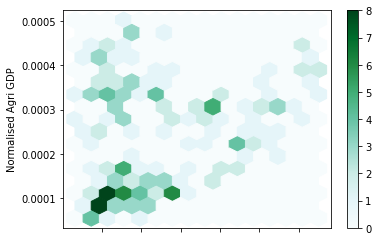

In [131]:
nor_corn_table.plot.hexbin(y='Normalised Agri GDP', x='GM corn area', gridsize=15)

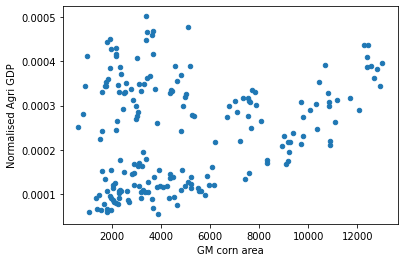

In [132]:
nor_corn_table.plot.scatter(y='Normalised Agri GDP', x='GM corn area' )


In [133]:
nor_corn_table['State'].unique()

array(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
       'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota',
       'Texas', 'Wisconsin'], dtype=object)

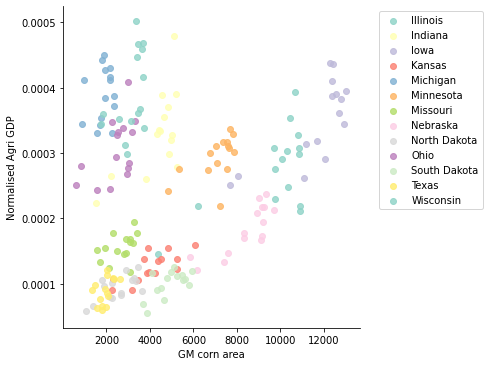

In [134]:
# library & dataset
import seaborn as sns

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="GM corn area", y="Normalised Agri GDP", data=nor_corn_table, fit_reg=False, hue='State', legend=False, palette=sns.color_palette("Set3", 13))
 
# Move the legend to an empty part of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
 
#sns.plt.show()


# Adding other variables to perform the regression

Then, I will add some other variables that may affect the Agricultural GDP other than GM crop production, and use them as control variables

Checking the correlation between Field crop totals and the agricultural GDP, to see whether the crops levels overall create the same linear relationship

In [135]:
crops_planted_acreage.rename({'Value':'All crops planted acreage'}, inplace=True)

In [136]:
crops_planted_acreage.head()

,Year,Period,State,Data Item,Value
0,2019,YEAR,Alabama,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",2115000
1,2019,YEAR,Alaska,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",28000
2,2019,YEAR,Arizona,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",634000
3,2019,YEAR,Arkansas,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",6598000
4,2019,YEAR,California,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",2939000


In [137]:
nor_corn_table.head()

,Year,State,Area planted,Area harvested for grain,Yield,Production,Attribute,GM corn area,Agri GDP,Normalised Agri GDP
0,2005,Illinois,12100,11950,143,1708850,Illinois,4356,3923,0.000145
1,2005,Indiana,5900,5770,154,888580,Indiana,1534,3334,0.000224
2,2005,Iowa,12800,12500,173,2162500,Iowa,7680,7813,0.000250
3,2005,Kansas,3650,3450,135,465750,Kansas,2299,5063,0.000107
4,2005,Michigan,2250,2010,143,287430,Michigan,900,3481,0.000345


In [138]:
jobs_and_wage.head()

,Year,ST,STATE,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000
0,2005,AL,Alabama,"Farm, ranch, and other agricultural managers",50,24,49100,23,46990,NaN
1,2005,AL,Alabama,"Agricultural workers, all other",110,12,25910,10,21060,NaN
2,2005,AZ,Arizona,"Agricultural workers, all other",**,12,25340,11,23000,NaN
3,2005,AR,Arkansas,"Farm, ranch, and other agricultural managers",50,25,52940,24,50800,NaN
4,2005,AR,Arkansas,"Agricultural workers, all other",250,8,17360,8,16350,NaN


In [139]:
jobs_and_wage.dtypes

Year          int64
ST           object
STATE        object
OCC_TITLE    object
TOT_EMP      object
H_MEAN       object
A_MEAN       object
H_MEDIAN     object
A_MEDIAN     object
JOBS_1000    object
dtype: object

In [140]:
jobs_and_wage.replace({"**": "0"}, inplace=True)

In [141]:
jobs_and_wage.replace({"NaN": "0"}, inplace=True)

In [142]:
jobs_and_wage.replace({"*": "0"}, inplace=True)

In [143]:
jobs_and_wage["TOT_EMP"] = jobs_and_wage["TOT_EMP"].astype(float).astype(int)
jobs_and_wage["H_MEAN"] = jobs_and_wage["H_MEAN"].astype(float).astype(int)
jobs_and_wage["A_MEAN"] = jobs_and_wage["A_MEAN"].astype(float).astype(int)
jobs_and_wage["H_MEDIAN"] = jobs_and_wage["H_MEDIAN"].astype(float).astype(int)
jobs_and_wage["A_MEDIAN"] = jobs_and_wage["A_MEDIAN"].astype(float).astype(int)

In [144]:
jobs_and_wage.dtypes

Year          int64
ST           object
STATE        object
OCC_TITLE    object
TOT_EMP       int64
H_MEAN        int64
A_MEAN        int64
H_MEDIAN      int64
A_MEDIAN      int64
JOBS_1000    object
dtype: object

In [145]:
jobs_and_wage=jobs_and_wage.merge(population, how='inner', left_on=['Year', 'STATE'], right_on=['Year', 'State'])

In [146]:
jobs_and_wage.head()

,Year,ST,STATE,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,State,Population
0,2005,AL,Alabama,"Farm, ranch, and other agricultural managers",50,24,49100,23,46990,NaN,Alabama,4569805
1,2005,AL,Alabama,"Agricultural workers, all other",110,12,25910,10,21060,NaN,Alabama,4569805
2,2005,AZ,Arizona,"Agricultural workers, all other",0,12,25340,11,23000,NaN,Arizona,5839077
3,2005,AR,Arkansas,"Farm, ranch, and other agricultural managers",50,25,52940,24,50800,NaN,Arkansas,2781097
4,2005,AR,Arkansas,"Agricultural workers, all other",250,8,17360,8,16350,NaN,Arkansas,2781097


In [147]:
exports.columns

Index(['Year', 'States', 'Agri exports ', 'Corn exports'], dtype='object')

In [148]:
exports.dtypes

Year               int64
States            object
Agri exports     float64
Corn exports     float64
dtype: object

In [149]:
exports["Agri exports "] = exports["Agri exports "].astype(float).astype(int)
exports["Corn exports"] = exports["Corn exports"].astype(float).astype(int)

TABLE WITH AGRI GDP; EXPORTS; JOBS; WAGES; TOTAL CROP ACREAGE

In [150]:
gdp_agri.head()

,Year,State,Agri GDP
0,2005,United States,196126
1,2005,Alabama,3837
2,2005,Alaska,417
3,2005,Arizona,3019
4,2005,Arkansas,4282


In [151]:
all_states = gdp_agri.merge(exports, how='inner', left_on=['Year', 'State'], right_on=['Year', 'States'])

In [152]:
all_states = all_states.merge(jobs_and_wage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'STATE'])

In [153]:
all_states = all_states.merge(crops_planted_acreage, how='inner', left_on=['Year', 'STATE'], right_on=['Year', 'State'])

In [154]:
all_states = all_states.merge(acres_operated, how='inner', left_on=['Year', 'STATE'], right_on=['Year', 'State'])

In [155]:
all_states.head()

,Year,State_x,Agri GDP,States,Agri exports,Corn exports,ST,STATE,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,State_y,Population,Period,State_x,Data Item,Value_x,State_y,Value_y
0,2005,Alabama,3837,Alabama,774,9,AL,Alabama,"Farm, ranch, and other agricultural managers",50,24,49100,23,46990,NaN,Alabama,4569805,YEAR,Alabama,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",2037000,Alabama,8800000
1,2005,Alabama,3837,Alabama,774,9,AL,Alabama,"Agricultural workers, all other",110,12,25910,10,21060,NaN,Alabama,4569805,YEAR,Alabama,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",2037000,Alabama,8800000
2,2005,Arizona,3019,Arizona,663,1,AZ,Arizona,"Agricultural workers, all other",0,12,25340,11,23000,NaN,Arizona,5839077,YEAR,Arizona,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",730000,Arizona,26250000
3,2005,Arkansas,4282,Arkansas,1939,17,AR,Arkansas,"Farm, ranch, and other agricultural managers",50,25,52940,24,50800,NaN,Arkansas,2781097,YEAR,Arkansas,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",7559000,Arkansas,14200000
4,2005,Arkansas,4282,Arkansas,1939,17,AR,Arkansas,"Agricultural workers, all other",250,8,17360,8,16350,NaN,Arkansas,2781097,YEAR,Arkansas,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",7559000,Arkansas,14200000


TABLE WITH CORN; GM CORN; AGRI GDP; EXPORTS; JOBS; WAGES; TOTAL CROP ACREAGE

In [156]:
nor_corn_table = nor_corn_table.merge(crops_planted_acreage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'State'])

In [157]:
nor_corn_table = nor_corn_table.merge(exports, how='inner', left_on=['Year', 'State'], right_on=['Year', 'States'])

In [158]:
nor_corn_table = nor_corn_table.merge(jobs_and_wage, how='inner', left_on=['Year', 'State'], right_on=['Year', 'STATE'])

In [159]:
nor_corn_table.head()

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,Attribute,GM corn area,Agri GDP,Normalised Agri GDP,Period,Data Item,Value,States,Agri exports,Corn exports,ST,STATE,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,State_y,Population
0,2005,Illinois,12100,11950,143,1708850,Illinois,4356,3923,0.000145,YEAR,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",23111000,Illinois,3694,917,IL,Illinois,"Farm, ranch, and other agricultural managers",0,24,49960,26,53770,NaN,Illinois,12609903
1,2005,Illinois,12100,11950,143,1708850,Illinois,4356,3923,0.000145,YEAR,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",23111000,Illinois,3694,917,IL,Illinois,"Agricultural workers, all other",250,13,27860,12,24710,NaN,Illinois,12609903
2,2005,Indiana,5900,5770,154,888580,Indiana,1534,3334,0.000224,YEAR,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",12330000,Indiana,1902,384,IN,Indiana,"Farm, ranch, and other agricultural managers",50,0,0,0,0,NaN,Indiana,6278616
3,2005,Indiana,5900,5770,154,888580,Indiana,1534,3334,0.000224,YEAR,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",12330000,Indiana,1902,384,IN,Indiana,"Agricultural workers, all other",0,18,37360,17,35310,NaN,Indiana,6278616
4,2005,Iowa,12800,12500,173,2162500,Iowa,7680,7813,0.000250,YEAR,"FIELD CROP TOTALS, PRINCIPAL, INCL POTATOES - ...",24680000,Iowa,4402,920,IA,Iowa,"Farm, ranch, and other agricultural managers",240,29,61200,25,51460,NaN,Iowa,2964454


In [160]:
nor_corn_table.drop(columns=['Attribute', 'States', 'Period', 'Data Item', 'STATE', 'State_y'], inplace=True)

In [161]:
nor_corn_table.head()

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Normalised Agri GDP,Value,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,Population
0,2005,Illinois,12100,11950,143,1708850,4356,3923,0.000145,23111000,3694,917,IL,"Farm, ranch, and other agricultural managers",0,24,49960,26,53770,NaN,12609903
1,2005,Illinois,12100,11950,143,1708850,4356,3923,0.000145,23111000,3694,917,IL,"Agricultural workers, all other",250,13,27860,12,24710,NaN,12609903
2,2005,Indiana,5900,5770,154,888580,1534,3334,0.000224,12330000,1902,384,IN,"Farm, ranch, and other agricultural managers",50,0,0,0,0,NaN,6278616
3,2005,Indiana,5900,5770,154,888580,1534,3334,0.000224,12330000,1902,384,IN,"Agricultural workers, all other",0,18,37360,17,35310,NaN,6278616
4,2005,Iowa,12800,12500,173,2162500,7680,7813,0.000250,24680000,4402,920,IA,"Farm, ranch, and other agricultural managers",240,29,61200,25,51460,NaN,2964454


In [162]:
nor_corn_table.rename({'Value':'All crops planted acreage'}, inplace=True, axis=1)

In [163]:
nor_corn_table.tail()

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Normalised Agri GDP,All crops planted acreage,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,Population
277,2019,North Dakota,3500,3230,141,455430,3360,4069,0.000104,23221000,4088,209,ND,"Farmers, Ranchers, and Other Agricultural Mana...",60,0,0,0,0,0.133,762062
278,2019,Ohio,2800,2570,164,421480,2492,4458,0.000328,8595000,3509,300,OH,"Farmers, Ranchers, and Other Agricultural Mana...",100,35,71850,32,66170,0.018,11689100
279,2019,Texas,2500,2150,133,285950,2375,13521,0.000107,21419000,6300,166,TX,"Farmers, Ranchers, and Other Agricultural Mana...",470,35,71830,32,66110,0.038,28995881
280,2019,Texas,2500,2150,133,285950,2375,13521,0.000107,21419000,6300,166,TX,"Agricultural Workers, All Other",980,13,26050,12,24870,0.079,28995881
281,2019,Wisconsin,3800,2680,168,450240,3382,7182,0.000502,7624000,2841,214,WI,"Farmers, Ranchers, and Other Agricultural Mana...",80,36,73920,31,65060,0.027,5822434


In [164]:
nor_corn_table['OCC_TITLE'].replace({"Farmers, Ranchers, and Other Agricultural Managers": "Farm, ranch, and other agricultural managers"}, inplace=True)

In [165]:
nor_corn_table['Agri GDP'] = nor_corn_table['Agri GDP']*1000000
nor_corn_table['Normalised Agri GDP'] = nor_corn_table['Normalised Agri GDP']*1000000
nor_corn_table['Area planted'] = nor_corn_table['Area planted']*1000
nor_corn_table['Area harvested for grain'] = nor_corn_table['Area harvested for grain']*1000

In [166]:
nor_corn_table['GM corn area'] = nor_corn_table['GM corn area']*1000

In [167]:
nor_corn_table['Agri exports '] = nor_corn_table['Agri exports ']*1000000
nor_corn_table['Corn exports'] = nor_corn_table['Corn exports']*1000000

In [168]:
nor_corn_table['Production'] = nor_corn_table['Production']*1000

In [169]:
nor_corn_table['Normalised Agri GDP'].round(2)

0      145.30
1      145.30
2      223.76
3      223.76
4      250.42
        ...  
277    103.54
278    327.79
279    106.89
280    106.89
281    502.24
Name: Normalised Agri GDP, Length: 282, dtype: float64

In [170]:
nor_corn_table

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Normalised Agri GDP,All crops planted acreage,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,Population
0,2005,Illinois,12100000,11950000,143,1708850000,4356000,3923000000,145.296296,23111000,3694000000,917000000,IL,"Farm, ranch, and other agricultural managers",0,24,49960,26,53770,NaN,12609903
1,2005,Illinois,12100000,11950000,143,1708850000,4356000,3923000000,145.296296,23111000,3694000000,917000000,IL,"Agricultural workers, all other",250,13,27860,12,24710,NaN,12609903
2,2005,Indiana,5900000,5770000,154,888580000,1534000,3334000000,223.758389,12330000,1902000000,384000000,IN,"Farm, ranch, and other agricultural managers",50,0,0,0,0,NaN,6278616
3,2005,Indiana,5900000,5770000,154,888580000,1534000,3334000000,223.758389,12330000,1902000000,384000000,IN,"Agricultural workers, all other",0,18,37360,17,35310,NaN,6278616
4,2005,Iowa,12800000,12500000,173,2162500000,7680000,7813000000,250.416667,24680000,4402000000,920000000,IA,"Farm, ranch, and other agricultural managers",240,29,61200,25,51460,NaN,2964454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2019,North Dakota,3500000,3230000,141,455430000,3360000,4069000000,103.536896,23221000,4088000000,209000000,ND,"Farm, ranch, and other agricultural managers",60,0,0,0,0,0.133,762062
278,2019,Ohio,2800000,2570000,164,421480000,2492000,4458000000,327.794118,8595000,3509000000,300000000,OH,"Farm, ranch, and other agricultural managers",100,35,71850,32,66170,0.018,11689100
279,2019,Texas,2500000,2150000,133,285950000,2375000,13521000000,106.885375,21419000,6300000000,166000000,TX,"Farm, ranch, and other agricultural managers",470,35,71830,32,66110,0.038,28995881
280,2019,Texas,2500000,2150000,133,285950000,2375000,13521000000,106.885375,21419000,6300000000,166000000,TX,"Agricultural Workers, All Other",980,13,26050,12,24870,0.079,28995881


In [171]:
len(nor_corn_table[(nor_corn_table['TOT_EMP']==0) & (nor_corn_table['OCC_TITLE']=='Agricultural workers, all other')])

16

In [172]:
nor_corn_table = nor_corn_table[nor_corn_table['OCC_TITLE']=='Farm, ranch, and other agricultural managers']

Changing missing values (0) in employment and wage to the mean so we can do the regression

In [173]:
mean_tot_emp = nor_corn_table[nor_corn_table['TOT_EMP']>0]['TOT_EMP'].median()

nor_corn_table['TOT_EMP'][nor_corn_table['TOT_EMP']==0] = mean_tot_emp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [174]:
mean_hour_wage = nor_corn_table[nor_corn_table['H_MEAN']>0]['H_MEAN'].mean()

nor_corn_table['H_MEAN'][nor_corn_table['H_MEAN']==0] = mean_hour_wage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [175]:
mean_ann_wage = nor_corn_table[nor_corn_table['A_MEAN']>0]['A_MEAN'].mean()

nor_corn_table['A_MEAN'][nor_corn_table['A_MEAN']==0] = mean_ann_wage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [176]:
mean_med_h_wage = nor_corn_table[nor_corn_table['H_MEDIAN']>0]['H_MEDIAN'].mean()

nor_corn_table['H_MEDIAN'][nor_corn_table['H_MEDIAN']==0] = mean_med_h_wage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [177]:
mean_med_a_wage = nor_corn_table[nor_corn_table['A_MEDIAN']>0]['A_MEDIAN'].mean()

nor_corn_table['A_MEDIAN'][nor_corn_table['A_MEDIAN']==0] = mean_med_a_wage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [178]:
nor_corn_table = nor_corn_table.round(5)

Making sure all categorical values are the same

In [179]:
nor_corn_table['OCC_TITLE'].unique

<bound method Series.unique of 0      Farm, ranch, and other agricultural managers
2      Farm, ranch, and other agricultural managers
4      Farm, ranch, and other agricultural managers
6      Farm, ranch, and other agricultural managers
10     Farm, ranch, and other agricultural managers
                           ...                     
276    Farm, ranch, and other agricultural managers
277    Farm, ranch, and other agricultural managers
278    Farm, ranch, and other agricultural managers
279    Farm, ranch, and other agricultural managers
281    Farm, ranch, and other agricultural managers
Name: OCC_TITLE, Length: 151, dtype: object>

In [180]:
nor_corn_table.tail()

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Normalised Agri GDP,All crops planted acreage,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,Population
276,2019,Nebraska,10100000,9810000,182,1785420000,9696000,9526000000,212.16036,19176000,6293000000,958000000,NE,"Farm, ranch, and other agricultural managers",190,31.00000,65180.00000,29.00000,61130.0,0.191,1934408
277,2019,North Dakota,3500000,3230000,141,455430000,3360000,4069000000,103.53690,23221000,4088000000,209000000,ND,"Farm, ranch, and other agricultural managers",60,31.25694,64871.94444,28.42361,59067.5,0.133,762062
278,2019,Ohio,2800000,2570000,164,421480000,2492000,4458000000,327.79412,8595000,3509000000,300000000,OH,"Farm, ranch, and other agricultural managers",100,35.00000,71850.00000,32.00000,66170.0,0.018,11689100
279,2019,Texas,2500000,2150000,133,285950000,2375000,13521000000,106.88538,21419000,6300000000,166000000,TX,"Farm, ranch, and other agricultural managers",470,35.00000,71830.00000,32.00000,66110.0,0.038,28995881
281,2019,Wisconsin,3800000,2680000,168,450240000,3382000,7182000000,502.23776,7624000,2841000000,214000000,WI,"Farm, ranch, and other agricultural managers",80,36.00000,73920.00000,31.00000,65060.0,0.027,5822434


In [181]:
nor_corn_table['N_TOT_EMP_1000'] = nor_corn_table['TOT_EMP'] / nor_corn_table['Population']

In [182]:
nor_corn_table['N_TOT_EMP_1000'] = nor_corn_table['N_TOT_EMP_1000'] * 1000

In [183]:
nor_corn_table=nor_corn_table.merge(acres_operated, left_on=['Year', 'State_x'], right_on=['Year', 'State'])

In [184]:
nor_corn_table.rename({'Value':'Acres operated in agriculture'}, inplace=True, axis=1)

In [185]:
nor_corn_table.drop(columns='State', inplace=True)

In [186]:
nor_corn_table['log_TOT_EMP'] = np.log10(nor_corn_table['TOT_EMP'])

In [187]:
nor_corn_table.tail()

,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Normalised Agri GDP,All crops planted acreage,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,Population,N_TOT_EMP_1000,Acres operated in agriculture,log_TOT_EMP
146,2019,Nebraska,10100000,9810000,182,1785420000,9696000,9526000000,212.16036,19176000,6293000000,958000000,NE,"Farm, ranch, and other agricultural managers",190,31.00000,65180.00000,29.00000,61130.0,0.191,1934408,0.098221,44900000,2.278754
147,2019,North Dakota,3500000,3230000,141,455430000,3360000,4069000000,103.53690,23221000,4088000000,209000000,ND,"Farm, ranch, and other agricultural managers",60,31.25694,64871.94444,28.42361,59067.5,0.133,762062,0.078734,39300000,1.778151
148,2019,Ohio,2800000,2570000,164,421480000,2492000,4458000000,327.79412,8595000,3509000000,300000000,OH,"Farm, ranch, and other agricultural managers",100,35.00000,71850.00000,32.00000,66170.0,0.018,11689100,0.008555,13600000,2.000000
149,2019,Texas,2500000,2150000,133,285950000,2375000,13521000000,106.88538,21419000,6300000000,166000000,TX,"Farm, ranch, and other agricultural managers",470,35.00000,71830.00000,32.00000,66110.0,0.038,28995881,0.016209,126500000,2.672098
150,2019,Wisconsin,3800000,2680000,168,450240000,3382000,7182000000,502.23776,7624000,2841000000,214000000,WI,"Farm, ranch, and other agricultural managers",80,36.00000,73920.00000,31.00000,65060.0,0.027,5822434,0.013740,14300000,1.903090


In [188]:
nor_corn_table['N_GM_corn_area '] = nor_corn_table['GM corn area'] / nor_corn_table['Acres operated in agriculture']

nor_corn_table['N_agri_exports'] = nor_corn_table['Agri exports '] / nor_corn_table['Acres operated in agriculture']

nor_corn_table['N_corn_exports'] = nor_corn_table['Corn exports'] / nor_corn_table['Acres operated in agriculture']

nor_corn_table = nor_corn_table.round(5)

In [189]:
nor_corn_table.to_csv('final_data_table.csv')

In [190]:
nor_corn_table.set_index('Year', inplace=True)

In [191]:
import pandas as pd
from sklearn import preprocessing
cols_to_norm = ['Normalised Agri GDP','N_GM_corn_area ', 'N_agri_exports', 'N_TOT_EMP_1000', 'H_MEAN', 'A_MEAN', 'Yield', 'log_TOT_EMP']
min_max_scaler = preprocessing.MinMaxScaler()
nor_corn_table[cols_to_norm] = min_max_scaler.fit_transform(nor_corn_table[cols_to_norm])


In [192]:
nor_corn_table

,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Normalised Agri GDP,All crops planted acreage,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,Population,N_TOT_EMP_1000,Acres operated in agriculture,log_TOT_EMP,N_GM_corn_area,N_agri_exports,N_corn_exports
Year,,,,,,,,,,,,,,,,,,,,,,,,,,
2005,Illinois,12100000,11950000,0.503704,1708850000,4356000,3923000000,0.202081,23111000,3694000000,917000000,IL,"Farm, ranch, and other agricultural managers",80,0.187500,0.193456,26.00000,53770.0,NaN,12609903,0.026109,27000000,0.356466,0.363671,0.298260,33.96296
2005,Indiana,5900000,5770000,0.585185,888580000,1534000,3334000000,0.377478,12330000,1902000000,384000000,IN,"Farm, ranch, and other agricultural managers",50,0.414279,0.417259,28.42361,59067.5,NaN,6278616,0.037479,14900000,0.185652,0.222956,0.273116,25.77181
2005,Iowa,12800000,12500000,0.725926,2162500000,7680000,7813000000,0.437071,24680000,4402000000,920000000,IA,"Farm, ranch, and other agricultural managers",240,0.343750,0.362149,25.00000,51460.0,NaN,2964454,0.549832,31200000,0.755736,0.568116,0.309990,29.48718
2005,Kansas,3650000,3450000,0.444444,465750000,2299000,5063000000,0.117273,22711000,2205000000,194000000,KS,"Farm, ranch, and other agricultural managers",80,0.281250,0.282756,29.00000,60160.0,NaN,2745299,0.186131,47160000,0.356466,0.092316,0.051154,4.11366
2005,Missouri,3100000,2970000,0.266667,329670000,1705000,3948000000,0.176450,13444000,1696000000,170000000,MO,"Farm, ranch, and other agricultural managers",50,0.375000,0.379559,26.00000,54610.0,NaN,5790300,0.042252,29500000,0.185652,0.114129,0.080611,5.76271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Nebraska,10100000,9810000,0.792593,1785420000,9696000,9526000000,0.351552,19176000,6293000000,958000000,NE,"Farm, ranch, and other agricultural managers",190,0.406250,0.421882,29.00000,61130.0,0.191,1934408,0.670971,44900000,0.670831,0.495324,0.307427,21.33630
2019,North Dakota,3500000,3230000,0.488889,455430000,3360000,4069000000,0.108731,23221000,4088000000,209000000,ND,"Farm, ranch, and other agricultural managers",60,0.414279,0.417259,28.42361,59067.5,0.133,762062,0.534180,39300000,0.251912,0.180896,0.208278,5.31807
2019,Ohio,2800000,2570000,0.659259,421480000,2492000,4458000000,0.610043,8595000,3509000000,300000000,OH,"Farm, ranch, and other agricultural managers",100,0.531250,0.521987,32.00000,66170.0,0.018,11689100,0.041620,13600000,0.437564,0.416482,0.630811,22.05882


---

# Regression and final visualisations

In [212]:
nor_corn_table.columns

Index(['State_x', 'Area planted', 'Area harvested for grain', 'Yield',
       'Production', 'GM corn area', 'Agri GDP', 'N_Agri_GDP',
       'All crops planted acreage', 'Agri exports ', 'Corn exports', 'ST',
       'OCC_TITLE', 'TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN',
       'JOBS_1000', 'Population', 'N_TOT_EMP_1000',
       'Acres operated in agriculture', 'log_TOT_EMP', 'N_GM_corn_area ',
       'N_agri_exports', 'N_corn_exports'],
      dtype='object')

In [206]:
nor_corn_table.rename(columns={'Normalised Agri GDP':'N_Agri_GDP'}, inplace=True)

In [214]:
nor_corn_table.rename(columns={'N_GM_corn_area ':'N_GM_corn_area'}, inplace=True)

Source:  https://www.statology.org/durbin-watson-test-python/

Before doing the linear regression, since the data is a time series it is important to check whether the data is autocorrelated, that would make it unsuitable for the linear regression. If the Durbin-Watson test lies between 1.5 and 2.5, then it is considered normal.

In [217]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model1 = ols('N_Agri_GDP ~ N_GM_corn_area ', data=nor_corn_table).fit()

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             N_Agri_GDP   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     150.9
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           2.15e-24
Time:                        16:53:21   Log-Likelihood:                 41.050
No. Observations:                 151   AIC:                            -78.10
Df Residuals:                     149   BIC:                            -72.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1565      0.028      5.

In [215]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('N_Agri_GDP ~ log_TOT_EMP + Yield + N_GM_corn_area ', data=nor_corn_table).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             N_Agri_GDP   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     73.62
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           3.97e-29
Time:                        16:50:57   Log-Likelihood:                 57.500
No. Observations:                 151   AIC:                            -107.0
Df Residuals:                     147   BIC:                            -94.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1471      0.051      2.

In [216]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


1.913739732005392

In [193]:
from sklearn.linear_model import LinearRegression 

In [194]:
nor_corn_table.columns

Index(['State_x', 'Area planted', 'Area harvested for grain', 'Yield',
       'Production', 'GM corn area', 'Agri GDP', 'Normalised Agri GDP',
       'All crops planted acreage', 'Agri exports ', 'Corn exports', 'ST',
       'OCC_TITLE', 'TOT_EMP', 'H_MEAN', 'A_MEAN', 'H_MEDIAN', 'A_MEDIAN',
       'JOBS_1000', 'Population', 'N_TOT_EMP_1000',
       'Acres operated in agriculture', 'log_TOT_EMP', 'N_GM_corn_area ',
       'N_agri_exports', 'N_corn_exports'],
      dtype='object')

In [195]:
Features = ['N_GM_corn_area ', 'log_TOT_EMP', 'Yield']
X = nor_corn_table[Features]
y = nor_corn_table['Normalised Agri GDP']

Removed 'N_agri_exports'

In [196]:
reg = LinearRegression().fit(X,y)

In [197]:
np.round(reg.coef_, 6)

array([ 0.537003, -0.301997,  0.284639])

In [198]:
reg.score(X,y)

0.6003966617816305

In [199]:
y_pred = reg.predict(X)

In [200]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'      
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'     
      % r2_score(y, y_pred)) 

Mean squared error: 0.03
Coefficient of determination: 0.60


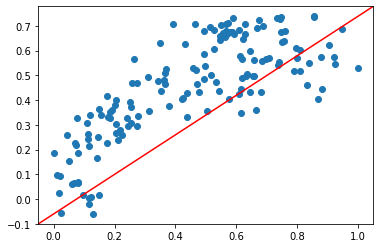

In [201]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(y, y_pred)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show() 

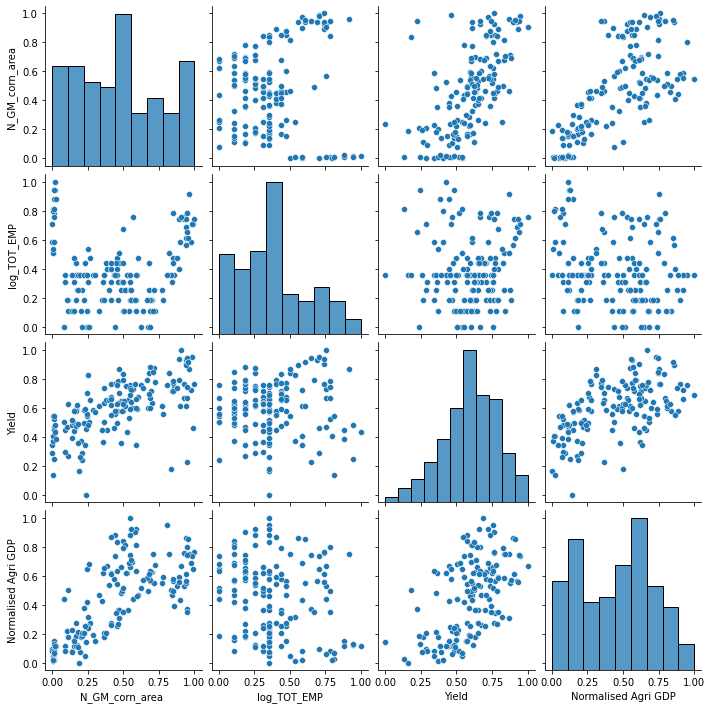

In [202]:
sns.pairplot(nor_corn_table[Features+['Normalised Agri GDP']])

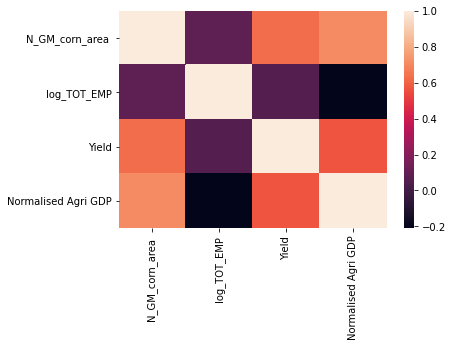

In [203]:
sns.heatmap(nor_corn_table[Features+['Normalised Agri GDP']].corr())

In [204]:
nor_corn_table[Features+['Normalised Agri GDP']]

,N_GM_corn_area,log_TOT_EMP,Yield,Normalised Agri GDP
Year,,,,
2005,0.363671,0.356466,0.503704,0.202081
2005,0.222956,0.185652,0.585185,0.377478
2005,0.568116,0.755736,0.725926,0.437071
2005,0.092316,0.356466,0.444444,0.117273
2005,0.114129,0.185652,0.266667,0.176450
...,...,...,...,...
2019,0.495324,0.670831,0.792593,0.351552
2019,0.180896,0.251912,0.488889,0.108731
2019,0.416482,0.437564,0.659259,0.610043


N_GM_corn_area 
log_TOT_EMP
Yield


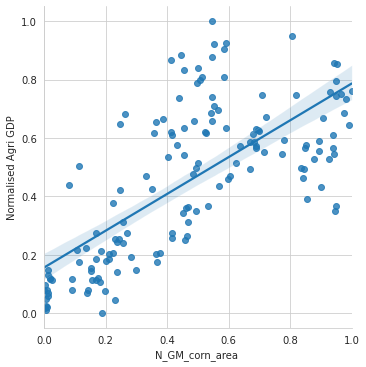

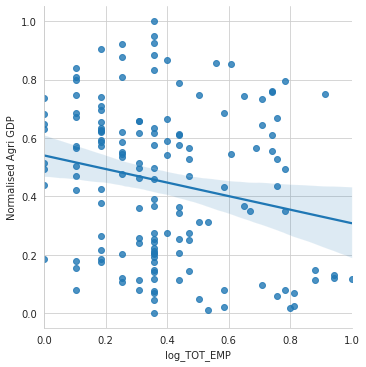

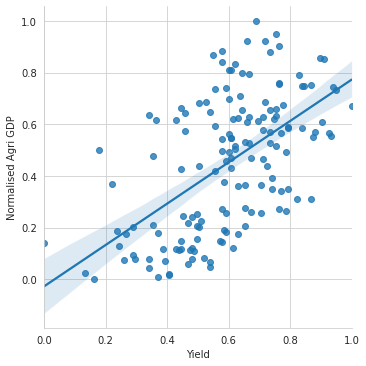

In [205]:
sns.set_style('whitegrid') 
for f in Features:
  print(f)
  sns.lmplot(x=f, y='Normalised Agri GDP', data=nor_corn_table)